In [1]:
# references
# https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
# Deep learning book - http://www.deeplearningbook.org/
# Stanford class - https://cs231n.github.io/


In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import the required modules
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical
%matplotlib inline 


In [35]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


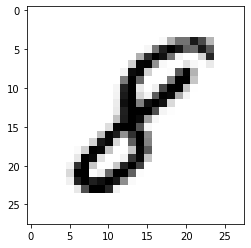

In [36]:
image_index = 7777
print(y_train[image_index]) # print image label
plt.imshow(x_train[image_index], cmap="Greys")

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
# reshaping the array to 4-dims to work with Keras API
img_rows = img_cols = 28
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# make sure values are floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the image values
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of iamges in x_train:', x_train.shape[0])


x_train shape: (60000, 28, 28, 1)
Number of iamges in x_train: 60000


In [45]:
# create sequential model and add layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10, activation=tf.nn.softmax))

In [47]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               605824    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
________________________________________________

In [40]:
# compile and fit the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 42s 692us/step - loss: 0.2059 - accuracy: 0.9384
Epoch 2/10
60000/60000 [==============================] - 42s 693us/step - loss: 0.0816 - accuracy: 0.9751
Epoch 3/10
60000/60000 [==============================] - 42s 700us/step - loss: 0.0574 - accuracy: 0.9820
Epoch 4/10
60000/60000 [==============================] - 42s 702us/step - loss: 0.0434 - accuracy: 0.9861
Epoch 5/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.0353 - accuracy: 0.9885
Epoch 6/10
60000/60000 [==============================] - 42s 692us/step - loss: 0.0307 - accuracy: 0.9898
Epoch 7/10
60000/60000 [==============================] - 40s 664us/step - loss: 0.0226 - accuracy: 0.9921
Epoch 8/10
60000/60000 [==============================] - 41s 685us/step - loss: 0.0222 - accuracy: 0.9924
Epoch 9/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.0204 - accuracy: 0.9924
Epoch 10/10
60000/60000 [============

In [41]:
# evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 191us/step


[0.06318867923625812, 0.9854000210762024]

pred score: 4
pred: [[3.3039797e-07 1.3641829e-09 3.2049789e-07 5.7302222e-11 9.9364966e-01
  3.4298678e-10 1.5028597e-07 1.9717226e-07 9.4741701e-08 6.3491222e-03]]


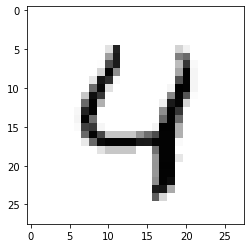

In [44]:
image_index = 4
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(f'pred score: {pred.argmax()}')
print(f'pred: {pred}')

In [53]:
# use another convnet from
# Deep learning with python

model1 = models.Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2,2,)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2,2,)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [54]:
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [59]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
model1.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 43s 718us/step - loss: 0.1653 - accuracy: 0.9489
Epoch 2/5
60000/60000 [==============================] - 45s 756us/step - loss: 0.0465 - accuracy: 0.9855
Epoch 3/5
60000/60000 [==============================] - 43s 717us/step - loss: 0.0316 - accuracy: 0.9904
Epoch 4/5
60000/60000 [==============================] - 44s 726us/step - loss: 0.0241 - accuracy: 0.9924
Epoch 5/5
60000/60000 [==============================] - 43s 715us/step - loss: 0.0195 - accuracy: 0.9943


In [62]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print(f'test loss: {test_loss}')
print(f'test acc: {test_acc}')

10000/10000 [==============================] - 3s 271us/step
test loss: 0.02157180633762291
test acc: 0.9937000274658203


pred score: 6
pred: [[1.45732731e-10 1.02448786e-10 9.58526115e-15 2.23924002e-15
  5.45495425e-07 2.98347658e-08 9.99999404e-01 4.01794212e-14
  2.29978842e-10 5.40128218e-13]]


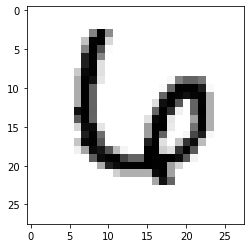

In [69]:
image_index = 4441
plt.imshow(x_test[image_index].reshape(28, 28), cmap='Greys')
pred = model1.predict(x_test[image_index].reshape(1,28,28,1))
print(f'pred score: {pred.argmax()}')
print(f'pred: {pred}')